In [27]:
from pytrends.request import TrendReq

from io import BytesIO
from base64 import decodebytes
from PIL import Image

import numpy as np
import pandas as pd

def get_test_string():
    return "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAGQAyADASIAAhEBAxEB/8QAHAABAQEAAwADAAAAAAAAAAAAAAgJAgYHAwQF/8QAQhABAAEDAQUFBQILBgcAAAAAAAECAwQFBgcICRESITh3tTE5hYa2E0EUFxkiR1FXYaXF0hUWQoGRlVJWWHGh0dP/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A1TAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxrrot0VXLlUU00xM1VTPSIj9cg5Dr/wCMPYD/AJ42f/3Ox/U417xd31uiq5c272epppiZqqnVLEREfrn84HYh4lqHG3wjaZm3sDL4idhftrFXYr+y1e1dp6/uromaZ/ymXmmu81Pgp0PV7mkRvMzdR+xq7FeVgaJl3cfr16T0rm3HbiP10xMT90yCuBnbrPOw3BYmpXsbRN1+3Wo4duqabeTcpxLE3en+KKPtapiJ+7rMT09sRPc6Hmc5bePruVfzt3nCxfzdEou1WLV+9qN+/XVXT0me1Nmx2KauzVRM0RNXTrHfPWAanDJ21zCOYpvi1fIvbk+G+jEwNPs0Rk2KNAys2aa6pnpVXeuTRTEz07qYiJ6UzPf3yaRsbzpdt8avaera7N0OM29cqjCy83TMOu3EVTHdZimfs6esT0iek9IifZMTIaxDKv8AFDzo/wBqH8b07+g/FDzo/wBqH8b07+gGqgg7g74aeOTQd9Eb5uKHfnn5OFi4l/Cp2co1q5m0Z3btzTTNy1R0x7NuiqqLlPY61TXR3xTHfN4gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOhb+NgdrN6G6PaXYHYbbzN2L13WMWmzha7hV103sOuLlFczE0VU1RFVNNVEzTMT0rnpLvoDKv8lrxof9YP8AGNW/9vhy+VHxd6xi3tK1zi2tZWBl26rORYu6jqd6i7RVHSaaqKp7NUT7Jie7o1aAZk0cj7YOKKYub/tfmrpHamNEsxEz+6PtZ6OX5D7YD9vu0H+y2P8A6NNAEKaNycOE7B0jDw9W1DbbU82zainIzZ1W3Zm/c6zM1dim12aI7+kUx7IiOs1T1qn03Y/lqcGOyGj2NJjc3h61ctV13Ks3WMu/k5F2qru/OntxT0iIiIpppimOnXp1mqZp4B51oHDlw/7LaRY0LQNymw+Hg4/fRap0HGn86YiJqqqqomaqpimOtVUzM9I6zLvOkaNpGz+nWdH0HSsPTcDGiYs4uHYps2bcTMzMU0URFMdZmZ7o9sy+4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/A2I2+2I3l6Ba2q3e7W6RtHo96uq3RnaXl0ZNma6Z6VU9qiZiKo++J74fvoA5KnhY2p8wM707Tl/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJB5oO/rejw9cPOkbWbpNoo0PWtU2tw9Ju5sY1q/Xbx6sbKv1RRTdpqoiZqx7cTM0z+bNUff1V8gDnV+FjZbzAwfTtRA5KnhY2p8wM707Tl/oA5KnhY2p8wM707Tl/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA51fhY2W8wMH07UV/oA51fhY2W8wMH07UQOSp4WNqfMDO9O05f6AOSp4WNqfMDO9O05f4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOdX4WNlvMDB9O1Ff6AOdX4WNlvMDB9O1EHauUNsRVspwbabr05tF+NstoNU1uKKaJpmxFFynB7EzMz2pn8B7fWOndXEdOsTM2qlXlceBPdl8a9YzVVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA51fhY2W8wMH07UV/oA51fhY2W8wMH07UQeq8rjwJ7svjXrGaqpKvK48Ce7L416xmqqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBzq/Cxst5gYPp2or/QBzq/Cxst5gYPp2og9V5XHgT3ZfGvWM1VSVeVx4E92Xxr1jNVUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDnV+FjZbzAwfTtRX+gDnV+FjZbzAwfTtRB6ryuPAnuy+NesZqqkq8rjwJ7svjXrGaqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHOr8LGy3mBg+naiv9AHOr8LGy3mBg+naiD1XlceBPdl8a9YzVVJV5XHgT3ZfGvWM1VQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADPrnW5eLRwx7I4NeTapyb23mJet2ZriK66KNPz4rqin2zFM10RM+yJrp6+2GgrKznnV1xRuUtxVPZmdo5mnr3TMf2b0n/AMz/AKgqnlceBPdl8a9YzVVJV5XHgT3ZfGvWM1VQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADKvnnfoT+ZP5a1UZQ82enUd7nFduL4cLddjAtZ9jHjH1GrrVNF7WNSjDqmqmP8NEYVurunv7VX6gVpyuPAnuy+NesZqqkq8rjwJ7svjXrGaqoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABlXx9e9N4cvlD6jymqjKvj696bw5fKH1HlAqrlceBPdl8a9YzVVJV5XHgT3ZfGvWM1VQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADKvj696bw5fKH1HlNVGVfH1703hy+UPqPKBVXK48Ce7L416xmqqSryuPAnuy+NesZqqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGVfH1703hy+UPqPKaqMq+Pr3pvDl8ofUeUCquVx4E92Xxr1jNVUlXlceBPdl8a9YzVVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMq+Pr3pvDl8ofUeU1UZV8fXvTeHL5Q+o8oFNcqXX9G1ngg2J07S9RtZOToWZq+n6jbonvxsirUb+RTbq/fNnIsV/wDa5SrpAHJU8LG1PmBnenacv8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABlXx9e9N4cvlD6jymqjKvj696bw5fKH1HlA+XkZ5eVXi76MCvJu1Y1m5s9et2ZrmaKK641CK6op9kTVFFETPtmKKevshqeyr5GP6bPlv8AmTVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABlXx9e9N4cvlD6jymqjKvj696bw5fKH1HlAcjH9Nny3/ADJqoyv5GWPepx99OVVbmLNyvZ23TX901UxqM1R/lFVP+rVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABlrx56TqeVzR+G/IxdPyL1u5/dfs1W7c1dYs6/k3L0933UUTFVU/dT3z3NSn172nafk5eNn5GDj3crD7f4NfrtU1XLPbjpX2KpjrT1junp7YBBHJU8LG1PmBnenacv8AeC8D/DrlcMHDtoO7PWvwK5tFXeyNU16/h3K67V3Nv19Y6TX/AMFmmxZ60xTFX2Xa6dapmfegAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf/2Q=="

pytrends = TrendReq(hl='en-GB', tz=0)
class Trend:
    @staticmethod
    def get_data(keyword, timeframe):
        pytrends.build_payload(kw_list=[keyword], timeframe=[timeframe])
        return pytrends.interest_over_time()
    
    def parse_data_url(data_url):
        data = data_url.split(',')[1]
        print(data)
        # image = Image.open(BytesIO(decodebytes(bytes(data, 'utf-8'))))
        # pixels = image.convert('RGB')
        image = Image.open('C:\\Users\\Python\\Desktop\\Screenshot 2024-10-06 113430.png')
        pixels = image.convert('RGB')
        pixels_array = np.array(pixels.getdata()).reshape(image.size + (3,))
        indices_array = np.moveaxis(np.indices(image.size), 0, 2)
        allArray = np.dstack((indices_array, pixels_array)).reshape((-1, 5))
        print(allArray[0:300])

        df = pd.DataFrame(allArray, columns=['x', 'y', 'red', 'green', 'blue'])
        
        return df
image_data = Trend.parse_data_url(get_test_string())
image_data

/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAGQAyADASIAAhEBAxEB/8QAHAABAQEAAwADAAAAAAAAAAAAAAgJAgYHAwQF/8QAQhABAAEDAQUFBQILBgcAAAAAAAECAwQFBgcICRESITh3tTE5hYa2E0EUFxkiR1FXYaXF0hUWQoGRlVJWWHGh0dP/

,x,y,red,green,blue
0,0,0,255,255,255
1,0,1,255,255,255
2,0,2,255,255,255
3,0,3,255,255,255
4,0,4,255,255,255
...,...,...,...,...,...
331672,806,406,255,255,255
331673,806,407,255,255,255
331674,806,408,255,255,255
331675,806,409,255,255,255


In [28]:
image_data[(image_data.red != 255) | (image_data.green != 255) | (image_data.blue != 255)]

,x,y,red,green,blue
6457,15,292,235,235,235
6458,15,293,187,187,187
6459,15,294,159,159,159
6460,15,295,156,156,156
6461,15,296,156,156,156
...,...,...,...,...,...
329243,801,32,156,156,156
329244,801,33,156,156,156
329245,801,34,159,159,159
329246,801,35,187,187,187


In [29]:
image_data.drop((image_data[image_data.red == 255].index) & (image_data[image_data.green == 255].index) & (image_data[image_data.blue == 255].index), inplace=True)
image_data = image_data.groupby(by='x', as_index=False, sort=False).mean()
image_data

,x,y,red,green,blue
0,15,351.000000,156.949580,156.949580,156.949580
1,16,205.000000,156.000000,156.000000,156.000000
2,17,134.029740,156.713755,156.713755,156.713755
3,19,257.000000,211.000000,211.000000,211.000000
4,21,242.000000,173.000000,173.000000,173.000000
...,...,...,...,...,...
504,795,86.000000,173.000000,173.000000,173.000000
505,797,71.000000,211.000000,211.000000,211.000000
506,799,234.977208,156.547009,156.547009,156.547009
507,800,205.000000,156.000000,156.000000,156.000000


<Axes: xlabel='y', ylabel='x'>

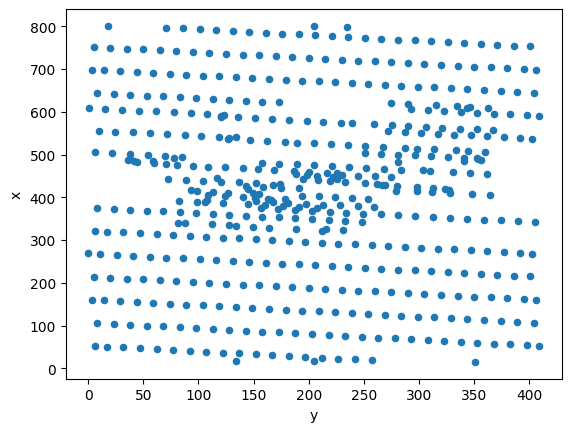

In [31]:
image_data.plot.scatter(x='y', y='x') #WHY IS IT NOT THE ORIGINAL PNG (looks like a sin curve)